Disclaimer: This document is a Colab Python file, created during one of the Supervised Learning lectures given by Professor Christian Calvo Masis. Therefore, all the credits for this Colab should be attributed to him.

##MNIST: Conjunto de Datos de Dígitos Manuscritos
**Origen**: El conjunto de datos MNIST fue creado por Yann LeCun, Corinna Cortes y Christopher J.C. Burges mientras trabajaban en AT&T Labs en 1998.

**Contenido**: Contiene 70,000 imágenes en escala de grises de dígitos escritos a mano, cada una de tamaño 28x28 píxeles. Las imágenes representan números del 0 al 9.

**Estructura**:

Conjunto de Entrenamiento: 60,000 imágenes etiquetadas, utilizadas para entrenar modelos de aprendizaje automático.

Conjunto de Prueba: 10,000 imágenes etiquetadas, utilizadas para evaluar la precisión de los modelos entrenados.

**Propósito**: MNIST se utiliza comúnmente como un conjunto de datos de referencia para probar algoritmos de clasificación y técnicas de reconocimiento de patrones en el contexto de la visión por computadora.

**Dificultade**s: Aunque MNIST ha sido utilizado durante mucho tiempo como un punto de referencia estándar, es un conjunto de datos relativamente simple en comparación con los conjuntos de datos modernos. Sin embargo, sigue siendo un excelente punto de partida para aprender y experimentar con algoritmos de clasificación.



In [ ]:
!pip install --upgrade tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 566.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 50.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 59.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 29.8 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.2.0
    Uninstalling ml-dtypes-0.2.0:
      Successfully uninstalled ml-dtypes-0.2.0
  Attempting uninstall: h5py
    Found existing installation: h5py 3.9.0
    Uninstalling h5py-3.9.0:
      Successfully uninstalled h5py-3.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.15.2
    Uninstalling tensorboard-2.15.2:
      Successfully uninstalled tensorboard-2.15.2
  Attempting uninstall: keras
    

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar el conjunto de datos MNIST
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#largo del conjunto de entrenamiento
len(X_train)

60000

In [4]:
#largo del conjnto de pruebas
len(X_test)

10000

In [5]:
# Normalizar las imágenes
X_train, X_test = X_train / 255.0, X_test / 255.0

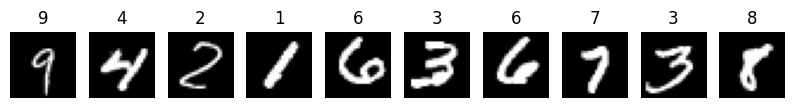

In [6]:
# Visualizar 10 imágenes aleatorias del conjunto de datos
def plot_sample_images(X, y, num_samples=10):
    plt.figure(figsize=(10, 1))
    indices = np.random.choice(len(X), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(X[idx], cmap='gray')
        plt.title(y[idx])
        plt.axis('off')
    plt.show()

plot_sample_images(X_train, y_train)

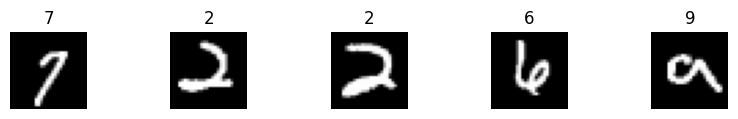

In [7]:
#ahora 5 más aleatorias
plot_sample_images(X_train, y_train, num_samples=5)

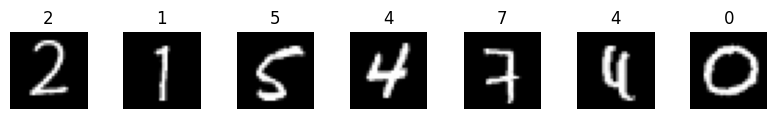

In [8]:
#otras 7
plot_sample_images(X_train, y_train, num_samples=7)

In [9]:
# Construir el modelo de red neuronal
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [10]:
# Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**ADAM**

Es un optimizador "Adaptive Moment Estimation" (Estimación de Momento Adaptativo). Combina dos técnicas principales: el método del momento y el método de la tasa de aprendizaje adaptativo.

**Funcionamiento del Optimizador Adam**

*Momentos de Primer y Segundo Orden:

Adam mantiene dos momentos de cada parámetro del modelo:

*   El primer momento (media) almacena la media móvil de los gradientes.
*   El segundo momento (varianza) almacena la media móvil de los cuadrados de los gradientes.

Estos momentos son actualizados durante el entrenamiento para tener en cuenta la dirección y la magnitud de los gradientes.

*Adaptación de la Tasa de Aprendizaje:

Adam adapta la tasa de aprendizaje de forma individual para cada parámetro del modelo.

La tasa de aprendizaje se ajusta en función de la magnitud de los momentos almacenados. Los parámetros con gradientes grandes tendrán una tasa de aprendizaje más baja, mientras que los parámetros con gradientes pequeños tendrán una tasa de aprendizaje más alta.

*Regularización Incorporada:

Adam también incorpora una forma de regularización al tener en cuenta los momentos de segundo orden. Esto ayuda a suavizar las actualizaciones de los parámetros durante el entrenamiento.

In [11]:
# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8630 - loss: 0.4747 - val_accuracy: 0.9553 - val_loss: 0.1522
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9613 - loss: 0.1343 - val_accuracy: 0.9664 - val_loss: 0.1147
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9732 - loss: 0.0910 - val_accuracy: 0.9699 - val_loss: 0.0994
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9796 - loss: 0.0663 - val_accuracy: 0.9701 - val_loss: 0.0923
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9865 - loss: 0.0464 - val_accuracy: 0.9750 - val_loss: 0.0851
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9900 - loss: 0.0357 - val_accuracy: 0.9758 - val_loss: 0.0857
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9922 - loss: 0.0267 - val_accuracy: 0.9743 - val_loss: 0.0874
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9946 - loss: 0.0196 

In [11]:
# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc:.2f}')

313/313 [==============================] - 3s 7ms/step - loss: 0.0797 - accuracy: 0.9774
Precisión en el conjunto de prueba: 0.98


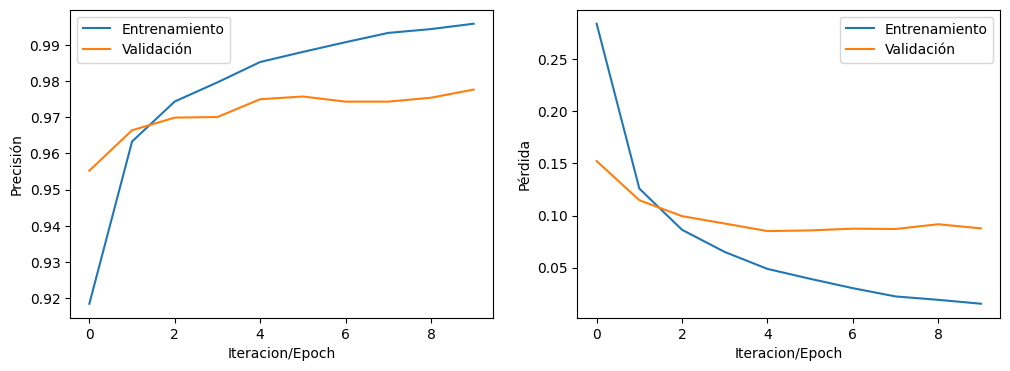

In [12]:
# Visualizar el historial de entrenamiento
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    # Precisión
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Validación')
    plt.xlabel('Iteracion/Epoch')
    plt.ylabel('Precisión')
    plt.legend()

    # Pérdida
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Entrenamiento')
    plt.plot(history.history['val_loss'], label='Validación')
    plt.xlabel('Iteracion/Epoch')
    plt.ylabel('Pérdida')
    plt.legend()

    plt.show()

plot_training_history(history)

In [13]:
# Hacer predicciones
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


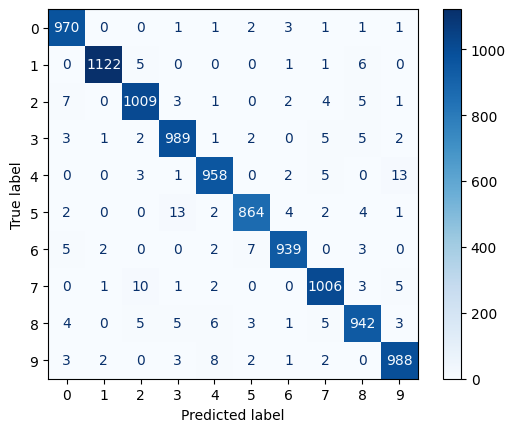

In [14]:
# Crear la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))
disp.plot(cmap=plt.cm.Blues)
plt.show()

#Otros optimizadores

Existen otros optimizadores, en general Adam es el más usado porque combina características de otros.

**SGD (Stochastic Gradient Descent)**
 SGD es el algoritmo de optimización más básico que actualiza los parámetros de un modelo en la dirección opuesta al gradiente de la función de pérdida. La versión estocástica utiliza un solo ejemplo aleatorio de entrenamiento para cada actualización de los parámetros.

Ventajas:

* Simplicidad y facilidad de implementación.
* Menor consumo de memoria que optimizadores más complejos.

Desventajas:

* Puede ser lento para converger, especialmente en problemas con gradientes dispersos o ruidosos.
* Requiere ajustes cuidadosos de la tasa de aprendizaje y otros hiperparámetros.

**RMSprop (Root Mean Square Propagation)**
RMSprop es una variante del método de gradiente descendente que adapta la tasa de aprendizaje para cada parámetro de forma adaptativa. Almacena una media móvil ponderada de los cuadrados de los gradientes y utiliza esta información para escalar la tasa de aprendizaje.

Ventajas:

* Tiene en cuenta la magnitud de los gradientes para ajustar la tasa de aprendizaje.

* Funciona bien en problemas con gradientes dispersos o ruidosos.

Desventajas:

* Puede requerir ajustes cuidadosos de la tasa de aprendizaje y otros hiperparámetros.

* No es tan ampliamente utilizado como Adam en la práctica actual.



In [15]:
# Construir el modelo de red neuronal
def build_model(optimizer):
    model = models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [17]:
# Entrenar el modelo con diferentes optimizadores
optimizers_list = ['adam', 'sgd', 'rmsprop']
histories = []

for optimizer_name in optimizers_list:
    print(f"\nEntrenando modelo con optimizador {optimizer_name.upper()}")
    model = build_model(optimizer=optimizer_name)
    history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, verbose=0)
    histories.append(history)


Entrenando modelo con optimizador ADAM


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)



Entrenando modelo con optimizador SGD

Entrenando modelo con optimizador RMSPROP


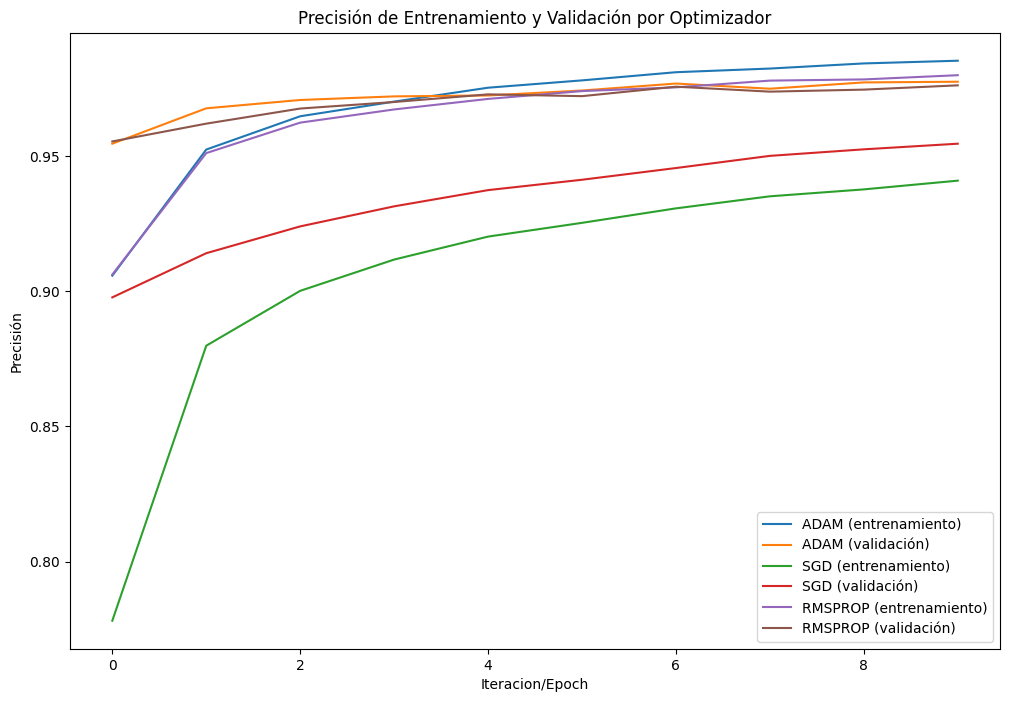

In [18]:
# Visualizar el historial de entrenamiento y validación para cada optimizador
plt.figure(figsize=(12, 8))
for i, history in enumerate(histories):
    optimizer_name = optimizers_list[i].upper()
    plt.plot(history.history['accuracy'], label=f'{optimizer_name} (entrenamiento)')
    plt.plot(history.history['val_accuracy'], label=f'{optimizer_name} (validación)')

plt.title('Precisión de Entrenamiento y Validación por Optimizador')
plt.xlabel('Iteracion/Epoch')
plt.ylabel('Precisión')
plt.legend()
plt.show()